# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Agus Wahyudi]
- **Email:** [wahyoediagoes13@gmail.com]
- **ID Dicoding:** [audi1308]

## Menentukan Pertanyaan Bisnis

- What season are bicycle rental services most used?
- How do weather and temperature conditions can affect the amount of bicycle use?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("data\day.csv")
df_hour = pd.read_csv("data\hour.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Agus Wahyudi\AppData\Local\Temp\ipykernel_21304\1684458815.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_day = pd.read_csv("dataset\day.csv")
C:\Users\Agus Wahyudi\AppData\Local\Temp\ipykernel_21304\1684458815.py:2: SyntaxWarning: invalid escape sequence '\h'
  df_hour = pd.read_csv("dataset\hour.csv")


**Data Information**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

For further more information please go through the following link,
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

### Assessing Data

In [5]:
# Check duplicate dan missing values df_day
print("Missing values in df_day dataframe: ")
print(df_day.isna().sum())
print("Total duplicate in df_day dataframe: ", df_day.duplicated().sum())

Missing values in df_day dataframe: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Total duplicate in df_day dataframe:  0


In [6]:
# Check duplicate dan missing values df_hour
print("Missing values in df_hour dataframe: ")
print(df_hour.isna().sum())
print("Total duplicate in df_hour dataframe: ", df_hour.duplicated().sum())

Missing values in df_hour dataframe: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Total duplicate in df_hour dataframe:  0


In [7]:
# Get the number of rows and columns
num_rows, num_columns = df_hour.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 17379
Number of columns: 17


In [8]:
# Get the number of rows and columns
num_rows, num_columns = df_day.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 731
Number of columns: 16


In [9]:
df_hour.groupby('dteday')['cnt'].sum()

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

Based on the grouping in df_hour, we can see that the total rows df_hour that already grouping is the same with the df_day then we can choose one of the dateset.

### Cleaning Data

In [10]:
# Convert column 'dteday' to be datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [11]:
# Change the atribut of data typoe to be "category"
atribut_day = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}
df_day.rename(columns=atribut_day, inplace=True)

atribut_hour = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'hr': 'hour', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}
df_hour.rename(columns=atribut_hour, inplace=True)

In [12]:
df_day['season'] = df_day['season'].astype('category')
df_day['year'] = df_day['year'].astype('category')
df_day['month'] = df_day['month'].astype('category')
df_day['holiday'] = df_day['holiday'].astype('category')
df_day['weekday'] = df_day['weekday'].astype('category')
df_day['workingday'] = df_day['workingday'].astype('category')
df_day['weather'] = df_day['weather'].astype('category')

df_hour['season'] = df_hour['season'].astype('category')
df_hour['year'] = df_hour['year'].astype('category')
df_hour['month'] = df_hour['month'].astype('category')
df_hour['hour'] = df_hour['hour'].astype('category')
df_hour['holiday'] = df_hour['holiday'].astype('category')
df_hour['weekday'] = df_hour['weekday'].astype('category')
df_hour['workingday'] = df_hour['workingday'].astype('category')
df_hour['weather'] = df_hour['weather'].astype('category')

In [13]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   month        17379 non-null  category      
 5   hour         17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weather      17379 non-null  category      
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  tota

In [14]:
# Change the category based on the information data
df_day['season'] = df_day['season'].map({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
df_day['year'] = df_day['year'].map({0: 2011, 1: 2012})
df_day['month'] = df_day['month'].apply(lambda x: calendar.month_name[x])
df_day['holiday'] = df_day['holiday'].map({0: 'no', 1: 'yes'})
df_day['weekday'] = df_day['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
df_day['workingday'] = df_day['workingday'].map({0: 'no', 1: 'yes'})

df_hour['season'] = df_hour['season'].map({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
df_hour['year'] = df_hour['year'].map({0: 2011, 1: 2012})
df_hour['month'] = df_hour['month'].apply(lambda x: calendar.month_name[x])
df_hour['holiday'] = df_hour['holiday'].map({0: 'no', 1: 'yes'})
df_hour['weekday'] = df_hour['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
df_hour['workingday'] = df_hour['workingday'].map({0: 'no', 1: 'yes'})

In [15]:
# Return atrlibut value before do the normalisation to the original scala [temperature, atemp, hum, dan windspeed]
df_day['temperature'] = df_day['temperature'] * 41
df_day['atemp'] = df_day['atemp'] * 50
df_day['humidity'] = df_day['humidity'] * 100
df_day['windspeed'] = df_day['windspeed'] * 67

df_hour['temperature'] = df_hour['temperature'] * 41
df_hour['atemp'] = df_hour['atemp'] * 50
df_hour['humidity'] = df_hour['humidity'] * 100
df_hour['windspeed'] = df_hour['windspeed'] * 67


## Exploratory Data Analysis (EDA)

### Explore bike rental users based on several criteria

In [16]:
# Season
df_hour.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

C:\Users\Agus Wahyudi\AppData\Local\Temp\ipykernel_21304\3276629375.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby(by="season").agg({


,casual,registered,total
season,,,
fall,226091,835038,1061129
summer,203522,715067,918589
winter,129782,711831,841613
springer,60622,410726,471348


In [17]:
# Month
df_hour.groupby(by="month").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

C:\Users\Agus Wahyudi\AppData\Local\Temp\ipykernel_21304\2098577513.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby(by="month").agg({


,casual,registered,total
month,,,
August,72039,279155,351194
June,73906,272436,346342
September,70323,275668,345991
July,78157,266791,344948
May,75285,256401,331686
October,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
March,44444,184476,228920


In [18]:
# Weather
df_hour.groupby(by="weather").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

C:\Users\Agus Wahyudi\AppData\Local\Temp\ipykernel_21304\2512860536.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby(by="weather").agg({


,casual,registered,total
weather,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


In [19]:
# Hours
df_hour.groupby(by="hour").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

C:\Users\Agus Wahyudi\AppData\Local\Temp\ipykernel_21304\3847449081.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby(by="hour").agg({


,casual,registered,total
hour,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


In [20]:
# Holiday or not
df_hour.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

C:\Users\Agus Wahyudi\AppData\Local\Temp\ipykernel_21304\3843519295.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby(by="holiday").agg({


,casual,registered,total
holiday,,,
no,597658,2616586,3214244
yes,22359,56076,78435


In [21]:
df_day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,springer,2011,January,no,Sat,no,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,springer,2011,January,no,Sun,no,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,springer,2011,January,no,Mon,yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,springer,2011,January,no,Tue,yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,springer,2011,January,no,Wed,yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
"""
# See the correlation between atrbiut using heatmap correlation
correlation_matrix = df_day.corr()
correlation_with_total = correlation_matrix['total']
correlation_with_total_sorted = correlation_with_total.sort_values(ascending=False)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.loc[correlation_with_total_sorted.index, correlation_with_total_sorted.index], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Total')
plt.show()
"""

'\n# See the correlation between atrbiut using heatmap correlation\ncorrelation_matrix = df_day.corr()\ncorrelation_with_total = correlation_matrix[\'total\']\ncorrelation_with_total_sorted = correlation_with_total.sort_values(ascending=False)\n\n# Heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(correlation_matrix.loc[correlation_with_total_sorted.index, correlation_with_total_sorted.index], annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Correlation Heatmap with Total\')\nplt.show()\n'

## Visualization & Explanatory Analysis

### Pertanyaan 1: What season are bicycle rental services most used?

C:\Users\Agus Wahyudi\AppData\Local\Temp\ipykernel_21304\2657449972.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  musim = df_day.groupby(by="season").agg({


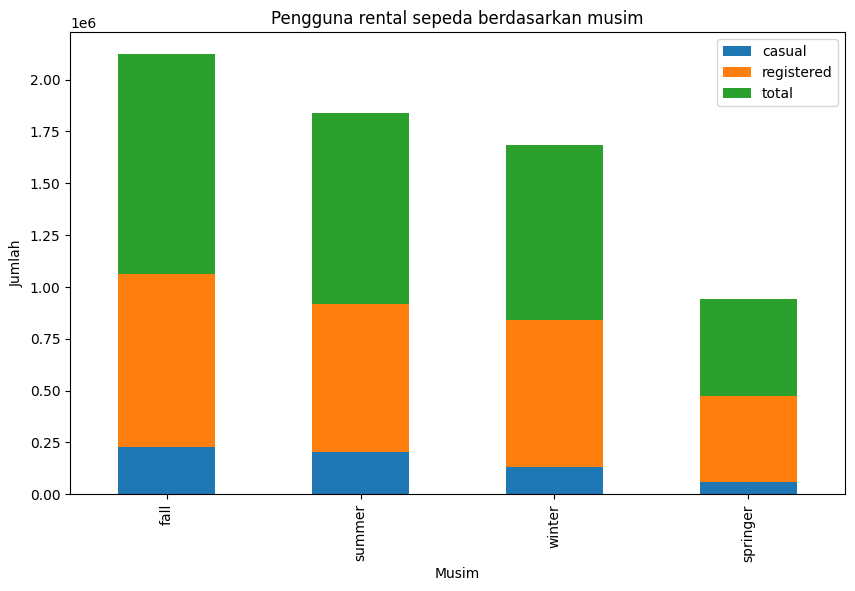

In [23]:
musim = df_day.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
musim.plot(kind='bar', stacked=True, ax=ax)

plt.title('Pengguna rental sepeda berdasarkan musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah')

plt.show()

By using barplot to easy to see in which season the bike renatal servie is most used. It can be found that in autumn the bike rental service is most used, followed by summer then winter and springer the least.

### Pertanyaan 2: How do weather and temperateure conditions can affect the amount of bicycle use?

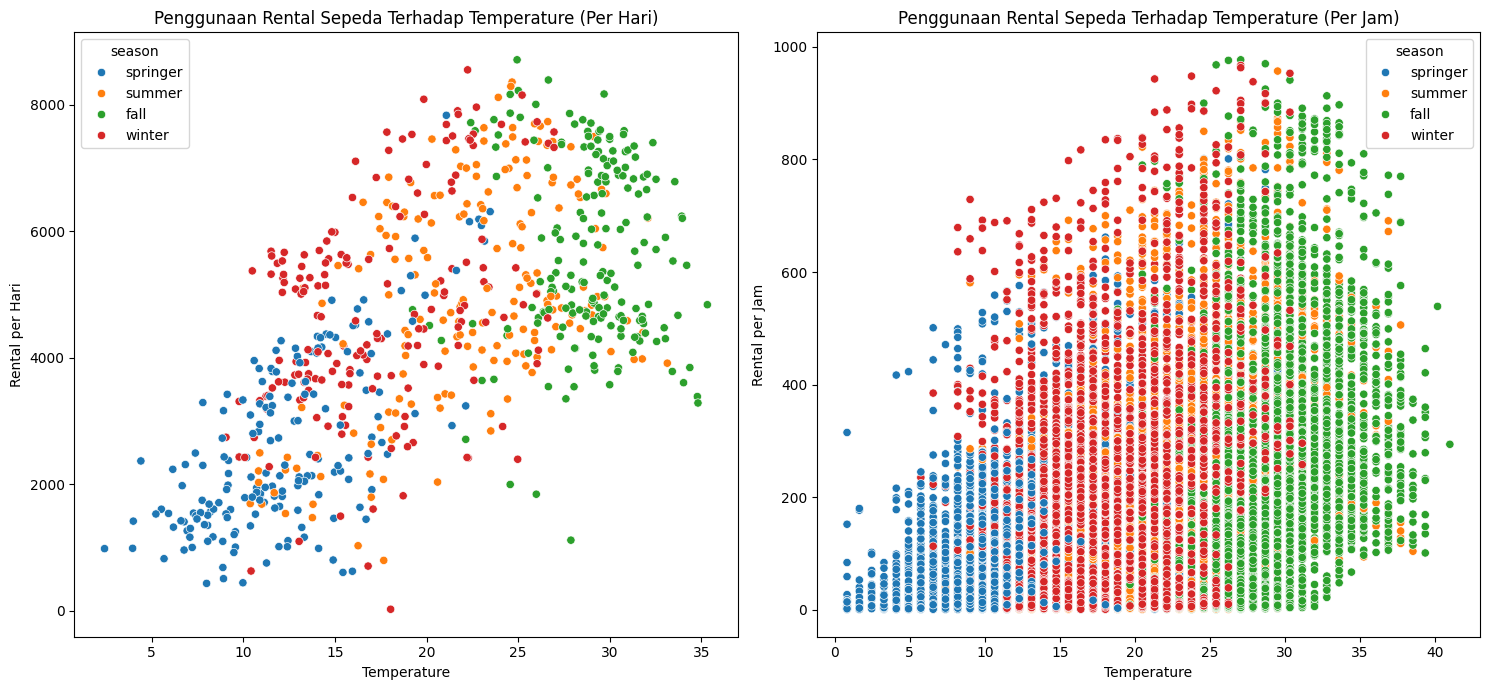

In [24]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_day, x='temperature', y='total', hue='season', legend='full')
plt.title('Penggunaan Rental Sepeda Terhadap Temperature (Per Hari)')
plt.xlabel('Temperature')
plt.ylabel('Rental per Hari')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_hour, x='temperature', y='total', hue='season', legend='full')
plt.title('Penggunaan Rental Sepeda Terhadap Temperature (Per Jam)')
plt.xlabel('Temperature')
plt.ylabel('Rental per Jam')

plt.tight_layout()
plt.show()

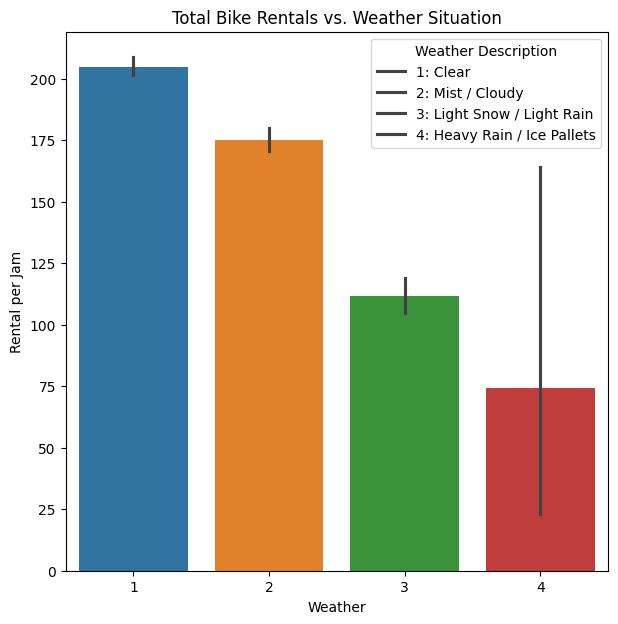

In [25]:
legend_labels = {
    1: 'Clear',
    2: 'Mist / Cloudy',
    3: 'Light Snow / Light Rain',
    4: 'Heavy Rain / Ice Pallets'
}
plt.figure(figsize=(7, 7))
sns.barplot(data=df_hour, x='weather', y='total', hue='weather')
plt.title('Total Bike Rentals vs. Weather Situation')
plt.xlabel('Weather')
plt.ylabel('Rental per Jam')
plt.legend(title='Weather Description', labels=[f'{key}: {value}' for key, value in legend_labels.items()], loc='upper right')

plt.show()

Average total bike rentals by temperature:
There is a clear positive trend that as the temperature increases, the total number of bike rentals also increases. This relationship is consistent across seasons, with warmer seasons such as summer and fall showing higher rentals at comparable temperatures.

Average total bike rentals by weather:
The average total rentals decrease as the weather conditions worsen (index 1-3, where 1 is the best weather and 3 is light snow or light rain)

## Conclusion

- Based on the barplot visualization graph, it can be concluded that the largest number of bicycle rental users is in the Fall season. This also shows that there is a clear tendency of preference for warmer months to rent a bicycle.

- Based on the scatterplot visualization, it can be concluded that bicycle rental users tend to increase in the normal temperature distribution (25-30). The scatter plot distribution also shows that in the spring and summer seasons (in the blue and orange color indexes), bicycle rental users are more than in the colder seasons (fall and winter).